In [138]:
import pandas as pd
import pickle
import numpy as np
import os
import sys
import argparse
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [139]:
df_diann = pd.read_csv("report.pr_matrix.tsv",sep="\t")

In [140]:
df_diann["Stripped.Sequence|Precursor.Charge"] = (
    df_diann["Stripped.Sequence"]
    + "|"
    + pd.Series(map(str, df_diann["Precursor.Charge"]))
)

In [141]:
df_mumdia = pd.read_csv("/home/robbin/MuMDIA_gh/MuMDIA/results/mokapot.psms.txt", sep="\t")
df_mumdia["stripped_peptide"] = df_mumdia["Peptide"].str.replace(
    r"\[.*?\]", "", regex=True
)

df_mumdia_filtered = df_mumdia[df_mumdia["mokapot q-value"] < 0.01]

In [142]:
df_mumdia_pin = pd.read_csv("outfile.pin", sep="\t")
df_mumdia_pin["stripped_peptide"] = df_mumdia_pin["Peptide"].str.replace(
    r"\[.*?\]", "", regex=True
)

In [143]:
df_mumdia_pin_broad = pd.read_csv(
    "/home/robbin/MuMDIA_gh/MuMDIA/outfile.pin", sep="\t"
)
df_mumdia_pin_broad["stripped_peptide"] = df_mumdia_pin_broad["Peptide"].str.replace(
    r"\[.*?\]", "", regex=True
)

In [144]:
df_basic_search = pd.read_csv(
    "/home/robbin/MuMDIA_gh/MuMDIA/results/df_fragment_max_peptide_initial_search.tsv",
    sep="\t",
)
df_basic_search["stripped_peptide"] = df_basic_search["peptide"].str.replace(
    r"\[.*?\]", "", regex=True
)

In [145]:
df_first_search = pd.read_csv(
    "/home/robbin/MuMDIA_gh/MuMDIA/results/df_fragment_max_peptide.tsv",
    sep="\t",
)

df_first_search["stripped_peptide"] = df_first_search["peptide"].str.replace(
    r"\[.*?\]", "", regex=True
)

In [146]:
overlapping_qval_filter = len(
    set(df_mumdia_filtered["stripped_peptide"]).intersection(
        set(df_diann["Stripped.Sequence"])
    )
)

overlapping = len(
    set(df_mumdia["stripped_peptide"]).intersection(set(df_diann["Stripped.Sequence"]))
)

overlapping_pin = len(
    set(df_mumdia_pin["stripped_peptide"]).intersection(set(df_diann["Stripped.Sequence"]))
)

overlapping_pin_broad = len(
    set(df_mumdia_pin_broad["stripped_peptide"]).intersection(set(df_diann["Stripped.Sequence"]))
)

overlapping_basic_search = len(
    set(df_basic_search["stripped_peptide"]).intersection(set(df_diann["Stripped.Sequence"]))
)

overlapping_first_search = len(
    set(df_first_search["stripped_peptide"]).intersection(set(df_diann["Stripped.Sequence"]))
)

number_of_peptides_pin = len(set(df_mumdia_pin["stripped_peptide"]))
number_of_peptides_diann = len(set(df_diann["Stripped.Sequence"]))
number_of_peptides_mumdia = len(set(df_mumdia["stripped_peptide"]))
number_of_peptides_mumdia_filtered = len(set(df_mumdia_filtered["stripped_peptide"]))
number_of_peptides_pin_broad = len(set(df_mumdia_pin_broad["stripped_peptide"]))
number_of_peptides_basic_search = len(set(df_basic_search["stripped_peptide"]))
number_of_peptides_first_search = len(set(df_first_search["stripped_peptide"]))

In [147]:
print("Total number of peptides in Diann: ", number_of_peptides_diann)
print("Total number of peptides in MumDIA: ", number_of_peptides_mumdia)
print("Total number of peptides in MumDIA (qval < 0.01): ", number_of_peptides_mumdia_filtered)
print("Total number of peptides in MumDIA (PIN): ", number_of_peptides_pin)
print("Total number of peptides in MumDIA (PIN broad): ", number_of_peptides_pin_broad)
print("Total number of peptides in Basic search: ", number_of_peptides_basic_search)
print("Total number of peptides in First search: ", number_of_peptides_first_search)
print()
print("Number of overlapping peptides (Basic search): ", overlapping_basic_search)
print("Number of overlapping peptides (First search): ", overlapping_first_search)
print("Number of overlapping peptides (PIN): ", overlapping_pin)
print("Number of overlapping peptides (PIN broad): ", overlapping_pin_broad)
print("Number of overlapping peptides: ", overlapping)
print("Number of overlapping peptides (qval < 0.01): ", overlapping_qval_filter)

Total number of peptides in Diann:  11657
Total number of peptides in MumDIA:  152095
Total number of peptides in MumDIA (qval < 0.01):  6007
Total number of peptides in MumDIA (PIN):  66563
Total number of peptides in MumDIA (PIN broad):  53
Total number of peptides in Basic search:  4647
Total number of peptides in First search:  369727

Number of overlapping peptides (Basic search):  4541
Number of overlapping peptides (First search):  10777
Number of overlapping peptides (PIN):  7666
Number of overlapping peptides (PIN broad):  36
Number of overlapping peptides:  10303
Number of overlapping peptides (qval < 0.01):  5705


In [148]:
df_mumdia_diann_filter = df_mumdia[df_mumdia["stripped_peptide"].isin(df_diann["Stripped.Sequence"])]

7995
8880
9402
9909
10760
3852


(array([5.316e+03, 1.189e+03, 7.340e+02, 6.100e+02, 1.760e+02, 2.610e+02,
        1.070e+02, 1.320e+02, 1.040e+02, 6.500e+01, 6.900e+01, 6.700e+01,
        7.400e+01, 6.600e+01, 3.600e+01, 5.100e+01, 4.600e+01, 5.700e+01,
        2.800e+01, 2.200e+01, 3.300e+01, 3.500e+01, 2.600e+01, 3.800e+01,
        2.700e+01, 4.400e+01, 1.500e+01, 2.200e+01, 1.700e+01, 1.500e+01,
        2.300e+01, 2.200e+01, 2.600e+01, 2.300e+01, 1.800e+01, 2.400e+01,
        2.200e+01, 2.600e+01, 1.500e+01, 2.600e+01, 1.900e+01, 2.100e+01,
        1.200e+01, 9.000e+00, 1.800e+01, 2.900e+01, 1.100e+01, 1.600e+01,
        1.800e+01, 1.900e+01, 1.300e+01, 1.800e+01, 1.200e+01, 2.000e+01,
        1.800e+01, 2.900e+01, 1.200e+01, 1.000e+01, 1.600e+01, 1.400e+01,
        1.400e+01, 1.600e+01, 1.600e+01, 7.000e+00, 1.700e+01, 7.000e+00,
        1.800e+01, 5.000e+00, 9.000e+00, 1.100e+01, 1.300e+01, 1.000e+01,
        2.000e+01, 1.100e+01, 1.000e+01, 1.100e+01, 9.000e+00, 2.700e+01,
        1.500e+01, 9.000e+00, 1.400e+0

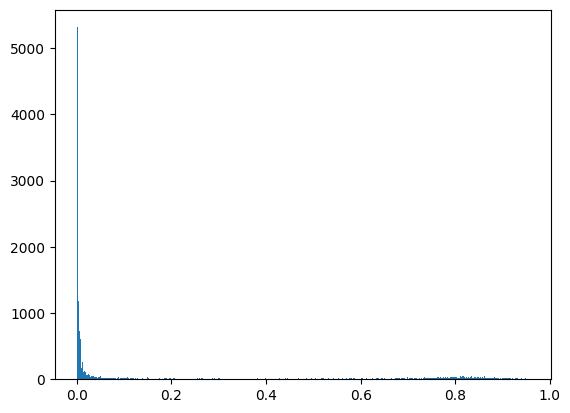

In [150]:
print(sum(df_mumdia_diann_filter["mokapot q-value"] <= 0.01))
print(sum(df_mumdia_diann_filter["mokapot q-value"] <= 0.025))
print(sum(df_mumdia_diann_filter["mokapot q-value"] <= 0.05))
print(sum(df_mumdia_diann_filter["mokapot q-value"] <= 0.1))
print(sum(df_mumdia_diann_filter["mokapot q-value"] <= 0.25))
print(sum(df_mumdia_diann_filter["mokapot q-value"] > 0.5))
plt.hist(df_mumdia_diann_filter["mokapot q-value"], bins=500)

8407
9609
10476
11680
15389


(array([5455., 1269.,  795.,  711.,  211.,  320.,  161.,  170.,  126.,
         107.,  105.,  106.,  113.,   87.,   72.,   83.,   84.,   94.,
          46.,   37.,   58.,   48.,   39.,   66.,   57.,   76.,   34.,
          48.,   60.,   35.,   45.,   41.,   47.,   44.,   42.,   55.,
          47.,   58.,   47.,   51.,   46.,   49.,   36.,   34.,   37.,
          56.,   30.,   58.,   62.,   39.,   37.,   48.,   48.,   58.,
          62.,   87.,   31.,   36.,   53.,   46.,   50.,   38.,   56.,
          39.,   49.,   21.,   71.,   29.,   44.,   29.,   55.,   39.,
          62.,   46.,   38.,   62.,   30.,   97.,   55.,   34.,   47.,
          36.,   27.,   35.,   39.,   40.,   38.,   41.,   35.,   40.,
          42.,   41.,   51.,   64.,   39.,   40.,   40.,   51.,   62.,
          36.,   43.,   49.,   53.,   94.,   51.,   36.,   65.,   54.,
          40.,   19.,   48.,   50.,   48.,   43.,   55.,   36.,   40.,
          26.,   45.,   30.,   76.,   34.,   54.,   50.,   64.,   36.,
      

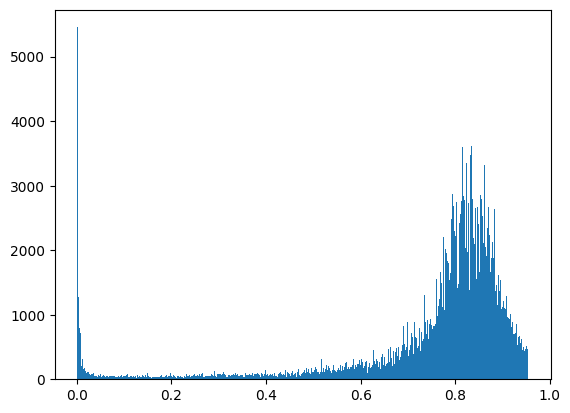

In [137]:
print(sum(df_mumdia["mokapot q-value"] <= 0.01))
print(sum(df_mumdia["mokapot q-value"] <= 0.025))
print(sum(df_mumdia["mokapot q-value"] <= 0.05))
print(sum(df_mumdia["mokapot q-value"] <= 0.1))
print(sum(df_mumdia["mokapot q-value"] <= 0.25))
plt.hist(df_mumdia["mokapot q-value"], bins=500)

In [154]:
import polars as pl
import numpy as np

# Create an example DataFrame.
df = pl.DataFrame(
    {
        "psm_id": [2.54375e6, 2.496317e6, 2.765359e6],
        "b8/1": [77214.53125, 23351.445312, 32973.621094],
        "y2/1": [5234.728027, 0.0, 0.0],
        "y12/1": [0.0, 5331.532715, 14635.193359],
    }
)

# Use pl.fold to compute the row-wise count of nonzero values.
nonzero_counts = (
    df.select(
        pl.fold(
            acc=pl.lit(0),
            exprs=[(pl.col(c) != 0).cast(pl.Int64) for c in df.columns],
            function=lambda acc, x: acc + x,
        ).alias("non_zero_count")
    )
    .to_numpy()
    .ravel()  # Flatten the resulting array if needed.
)

print("Row-wise nonzero counts:", nonzero_counts)

Row-wise nonzero counts: [3 3 3]
